In [11]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,f1_score,auc,roc_auc_score,accuracy_score

In [2]:
# Load Data
csv1 = pd.read_csv("1mayo - agosto 2021.csv",quoting=csv.QUOTE_NONE)
csv2 = pd.read_csv("2agosto -dic 2021.csv",quoting=csv.QUOTE_NONE)

train = csv1.copy()
test = csv2.copy()

In [3]:
train.head()

,"""MAC""","""weekday""","""fecha_servidor""","""fecha_esp32""","""voltaje""","""corriente""","""potencia""","""frecuencia""","""energia""","""fp""","""ESP32_temp""","""WORKSTATION_CPU""","""WORKSTATION_CPU_POWER""","""WORKSTATION_CPU_TEMP""","""WORKSTATION_GPU""","""WORKSTATION_GPU_POWER""","""WORKSTATION_GPU_TEMP""","""WORKSTATION_RAM""","""WORKSTATION_RAM_POWER"""
0,"""3C:61:05:12:96:30""","""4""","""2021-05-06 10:00:00""","""2021-05-06 10:00:00""","""120.1""","""0.93""","""96.3""","""60""","""1.16""","""0.86""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
1,"""3C:61:05:12:96:30""","""4""","""2021-05-06 10:00:01""","""2021-05-06 10:00:01""","""120.1""","""0.93""","""96.3""","""59.9""","""1.16""","""0.86""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
2,"""3C:61:05:12:96:30""","""4""","""2021-05-06 10:00:01""","""2021-05-06 10:00:01""","""120""","""0.94""","""96.6""","""59.9""","""1.16""","""0.86""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
3,"""3C:61:05:12:96:30""","""4""","""2021-05-06 10:00:02""","""2021-05-06 10:00:02""","""120""","""0.94""","""96.6""","""59.9""","""1.16""","""0.86""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
4,"""3C:61:05:12:96:30""","""4""","""2021-05-06 10:00:03""","""2021-05-06 10:00:03""","""120""","""0.94""","""96.6""","""59.9""","""1.16""","""0.86""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7887568 entries, 0 to 7887567
Data columns (total 19 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   "MAC"                    object
 1   "weekday"                object
 2   "fecha_servidor"         object
 3   "fecha_esp32"            object
 4   "voltaje"                object
 5   "corriente"              object
 6   "potencia"               object
 7   "frecuencia"             object
 8   "energia"                object
 9   "fp"                     object
 10  "ESP32_temp"             object
 11  "WORKSTATION_CPU"        object
 12  "WORKSTATION_CPU_POWER"  object
 13  "WORKSTATION_CPU_TEMP"   object
 14  "WORKSTATION_GPU"        object
 15  "WORKSTATION_GPU_POWER"  object
 16  "WORKSTATION_GPU_TEMP"   object
 17  "WORKSTATION_RAM"        object
 18  "WORKSTATION_RAM_POWER"  object
dtypes: object(19)
memory usage: 1.1+ GB


In [5]:
train.nunique()

"MAC"                            1
"weekday"                        7
"fecha_servidor"           6499426
"fecha_esp32"              6499426
"voltaje"                       15
"corriente"                    150
"potencia"                    1268
"frecuencia"                     7
"energia"                    14972
"fp"                            55
"ESP32_temp"                    21
"WORKSTATION_CPU"             1391
"WORKSTATION_CPU_POWER"        931
"WORKSTATION_CPU_TEMP"          50
"WORKSTATION_GPU"               36
"WORKSTATION_GPU_POWER"         11
"WORKSTATION_GPU_TEMP"         142
"WORKSTATION_RAM"              986
"WORKSTATION_RAM_POWER"       1404
dtype: int64

In [6]:
train.isnull().sum()

"MAC"                      0
"weekday"                  0
"fecha_servidor"           0
"fecha_esp32"              0
"voltaje"                  0
"corriente"                0
"potencia"                 0
"frecuencia"               0
"energia"                  0
"fp"                       0
"ESP32_temp"               0
"WORKSTATION_CPU"          0
"WORKSTATION_CPU_POWER"    0
"WORKSTATION_CPU_TEMP"     0
"WORKSTATION_GPU"          0
"WORKSTATION_GPU_POWER"    0
"WORKSTATION_GPU_TEMP"     0
"WORKSTATION_RAM"          0
"WORKSTATION_RAM_POWER"    0
dtype: int64

![alt text](info_ch.png)

In [7]:
#Data Preprocessing
def data_preprocessing(df):

    #Drop Quotation Marks in the whole dataframe
    df.columns = df.columns.str.replace('"','')
    df.replace({r'"': ''}, regex=True, inplace=True)

    # Drop unnecessary columns
    df = df.drop(['MAC','fecha_servidor'],axis=1)
    
    #Change data type
    df['fecha_esp32'] = pd.to_datetime(df['fecha_esp32'], format='%Y-%m-%d %H:%M:%S')
    df[["voltaje","corriente","potencia","frecuencia","energia","fp","ESP32_temp","WORKSTATION_CPU",
        "WORKSTATION_CPU_POWER","WORKSTATION_CPU_TEMP","WORKSTATION_GPU","WORKSTATION_GPU_POWER","WORKSTATION_GPU_TEMP",
        "WORKSTATION_RAM","WORKSTATION_RAM_POWER"]]=df[["voltaje","corriente","potencia","frecuencia","energia","fp","ESP32_temp","WORKSTATION_CPU",
        "WORKSTATION_CPU_POWER","WORKSTATION_CPU_TEMP","WORKSTATION_GPU","WORKSTATION_GPU_POWER","WORKSTATION_GPU_TEMP",
        "WORKSTATION_RAM","WORKSTATION_RAM_POWER"]].astype(float)
    df['weekday']=df['weekday'].astype(int)
    
    
    return df

train = data_preprocessing(train)
test = data_preprocessing(test)

Text(0.5, 1.0, 'Proportion of Sleeping and Working States based on CPU Power')

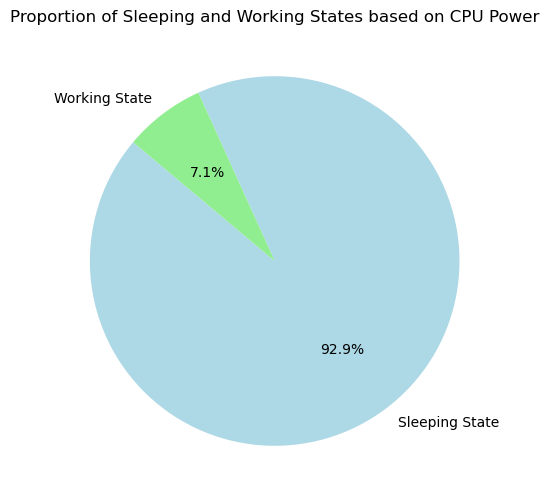

In [8]:
#Visualize the proportion of sleeping and working states based on CPU Power
CPU_Pow = train['WORKSTATION_CPU_POWER']
Sleeping_Count = CPU_Pow[CPU_Pow == 0].count()
Working_Count = CPU_Pow[CPU_Pow != 0].count()

labels = ['Sleeping State', 'Working State']
sizes = [Sleeping_Count, Working_Count]
colors = ['lightblue', 'lightgreen']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Sleeping and Working States based on CPU Power')

In [9]:
#Split the dataframe into sleeping part and working part
sleeping_df_train = train[train['WORKSTATION_CPU_POWER'] == 0]
working_df_train = train[train['WORKSTATION_CPU_POWER'] != 0]

working_df_train.head()

,weekday,fecha_esp32,voltaje,corriente,potencia,frecuencia,energia,fp,ESP32_temp,WORKSTATION_CPU,WORKSTATION_CPU_POWER,WORKSTATION_CPU_TEMP,WORKSTATION_GPU,WORKSTATION_GPU_POWER,WORKSTATION_GPU_TEMP,WORKSTATION_RAM,WORKSTATION_RAM_POWER
4145154,4,2021-06-10 02:13:04,119.9,1.14,125.1,59.9,81.89,0.92,33.89,11.28,36.71,33.0,1.0,35.0,15.00,32.29,6.97
4145155,4,2021-06-10 02:13:05,120.0,1.04,113.3,59.9,81.89,0.91,33.89,11.28,36.71,33.0,1.0,35.0,15.00,32.29,6.97
4145156,4,2021-06-10 02:13:06,119.9,1.17,128.4,60.0,81.89,0.92,33.89,11.28,36.71,33.0,1.0,35.0,15.00,32.29,6.97
4145157,4,2021-06-10 02:13:07,119.9,1.17,128.4,60.0,81.89,0.92,33.89,13.67,36.36,36.0,2.0,35.0,14.51,32.45,10.16
4145158,4,2021-06-10 02:13:08,120.0,1.08,117.9,60.0,81.89,0.91,33.89,13.67,36.36,36.0,2.0,35.0,14.51,32.45,10.16


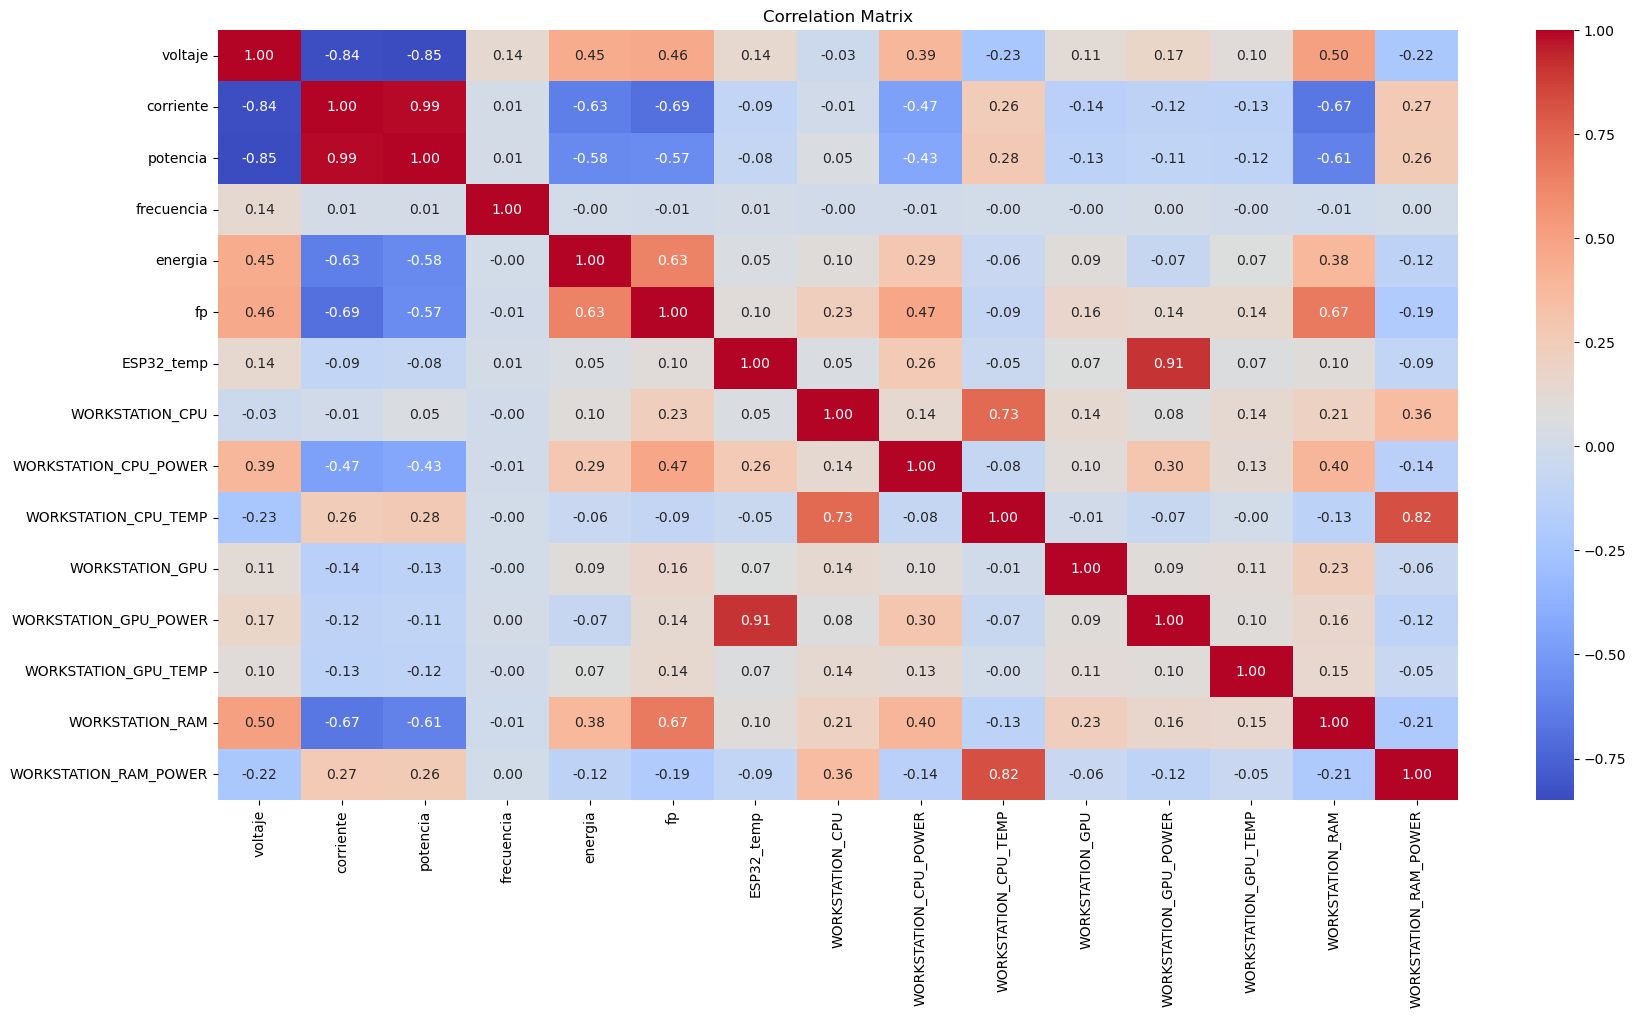

In [10]:
#EDA on Working State Dataframe
def eda_working_state(df):
    
    corr = df[["voltaje","corriente","potencia","frecuencia","energia","fp","ESP32_temp","WORKSTATION_CPU",
        "WORKSTATION_CPU_POWER","WORKSTATION_CPU_TEMP","WORKSTATION_GPU","WORKSTATION_GPU_POWER","WORKSTATION_GPU_TEMP",
        "WORKSTATION_RAM","WORKSTATION_RAM_POWER"]].corr()
    plt.figure(figsize=(20, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
    

eda_working_state(working_df_train)

In [12]:
#Forecasting Power Consumption using Random Forest Regressor
features = ['WORKSTATION_CPU','WORKSTATION_CPU_POWER','WORKSTATION_CPU_TEMP','WORKSTATION_GPU','WORKSTATION_GPU_POWER','WORKSTATION_GPU_TEMP','WORKSTATION_RAM','WORKSTATION_RAM_POWER']
target = 'potencia'

X = working_df_train[features]
y = working_df_train[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

Mean Squared Error: 60.190732029977234
R^2 Score: 0.6226615494223185


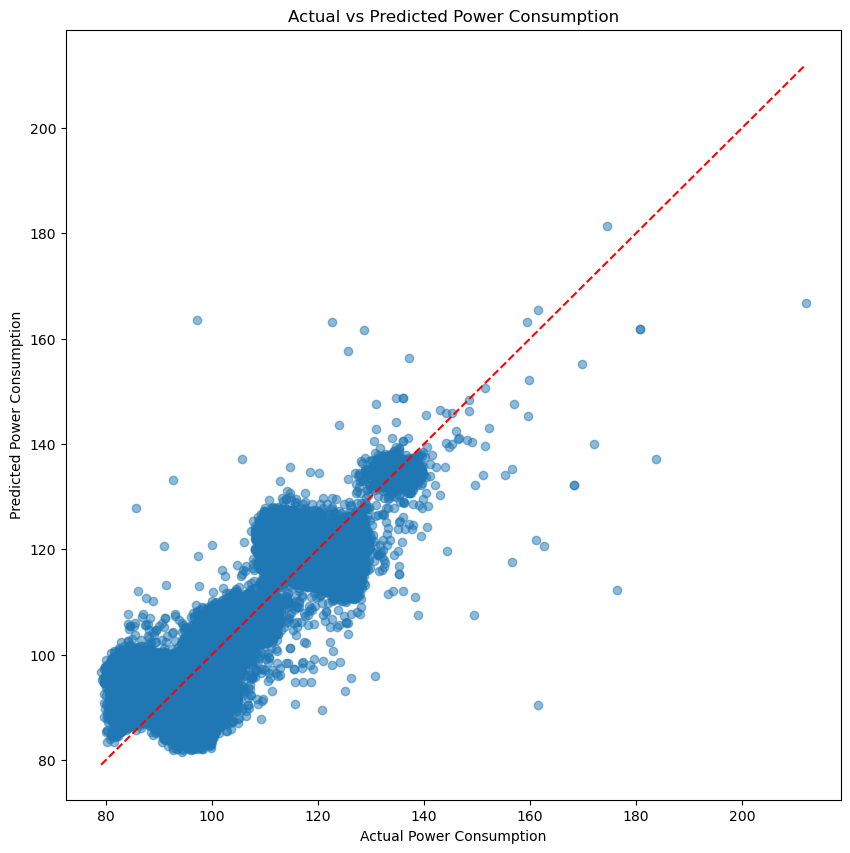

In [16]:
#Model Evaluation Visualization
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
plt.figure(figsize=(10,10))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel("Actual Power Consumption")
plt.ylabel("Predicted Power Consumption")
plt.title("Actual vs Predicted Power Consumption")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.show()